# Euler's method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In the previous exercise, we studied the initial value problem 
$$\frac{dy}{dx}=f(x,y)=y-x^2,\quad y(0)=1.$$
Using a step by step approach, we calculated *approximate* values of 
$$y(0.5),\quad y(1),\quad y(1.5),\quad y(2),\quad y(2.5)\,\quad y(3).$$
Plotting these approximations together with the solution curve and the direction field, we got the picture generated by the following cell.

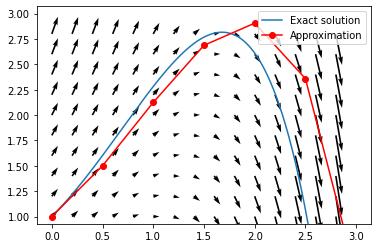

In [2]:
def sol(x) :
    return x**2+2*x+2-np.exp(x)

def f(x,y) :
    return y-x**2

X,Y = np.meshgrid(np.arange(0,3,0.2),np.arange(1,3,0.2))
U = np.ones(np.shape(X))
V = f(X,Y)
plt.quiver(X,Y,U,V)

xx = np.linspace(0,3,1000)
s = sol(xx) 
plt.plot(xx,s,label='Exact solution')
plt.plot([0,0.5,1,1.5,2,2.5,3],[1,1.5,2.125,2.6875,2.90625,2.359375,0.4140625],'o-r',label='Approximation')
plt.axis('equal')
plt.ylim(1,3)
plt.legend()

plt.show()

The approximation might not look too impressive, but we also realise that it should be possible to get better approximations by taking shorter steps and calculating the points closer together. This however, would also require more calculations, so it's about time we automated the process.

First, let's formalize what we've done. The method we applied is called Euler's method.

## Euler's method

Euler's method is a numerical method that gives us an *approximate* solution to the initial value problem
 
$$y'=f(x,y),\quad y(x_0)=y_0.$$
 
The basic idea is that the solution to this i.v.p is the unique curve that passes through $(x_0,y_0)$ and "follows the arrows of the direction field".
 
More precisely, we can apply this idea as follows.
 
Suppose we have a strictly increasing sequence of (tightly spaced) $x$-values
$$x_0<x_1<x_2<\ldots,$$
and let 
$$y_0=y(x_0),\quad y_1=y(x_1),\quad y_2=y(x_2),\quad\ldots.$$
 
The exact value of $y_0$ is given by the I.V.P. But we have to somehow *approximate* the values of $$y_1, y_2,\ldots.$$ 
 
Euler's method allows us to make such approximations 
$$y_1^*,\quad y_2^*,\quad y_3^*,\quad\ldots$$
for
$$y_1,\quad y_2,\quad y_3,\quad\ldots.$$
 
First, plot (or write down) the point $(x_0,y_0)$ through which our solution curve must pass.
Since the slope of the tangent to the solution curve $y=y(x)$ is given by the differential equation $y'=f(x,y)$ and since the value $y_0=y(x_0)$ is given, we can use a tangent line approximation to estimate the value of $y_1$ (i.e. we just follow the direction of the tangent (the arrow in the direction field) from $(x_0,y_0)$).

We get

$$y_1=y(x_1)\approx y(x_0)+y'(x_0)(x_1-x_0)=y_0+f(x_0,y_0)(x_1-x_0).$$

Call the above approximation $y_1^*$, i.e.

$$y_1^*=y_0+f(x_0,y_0)(x_1-x_0)$$

Since $y_1^*$ is an approximation of $y_1$, we can (supposing $f$ is continuous) approximate $y'(x_1)=f(x_1,y_1)$ by $f(x_1,y_1^*)$ and get 

$$y_2=y(x_2)\approx y(x_1)+y'(x_1)(x_2-x_1)\approx y_1^*+f(x_1,y_1^*)(x_2-x_1).$$

We call the above approximation $y_2^*$, i.e.

$$y_2^*=y_1^*+f(x_1,y_1^*)(x_1-x_0).$$

Repeat step 3 above to get $y_3^*$, $y_4^*,\ldots$.

Written more compactly, we get our approximations $y_k^*$ using the recurrent formula
$$y_0^*=y_0,\quad y_{k}^*=y_{k-1}^*+f(x_{k-1},y_{k-1}^*)(x_k-x_{k-1}), \quad k=1,2,\ldots.$$

## Exercise

Write a python function (below) that performs Euler's method. The objective is to calculate an approximate solution to the initial value problem
$$\frac{dy}{dx}=f(x,y),\quad y(x_0)=y_0.$$

Your function should take three arguments: `f`, `X` and `y0` where:

- `f` is another Python function `f(x,y)` representing the right hand side $f(x,y)$ of the d.e. above. (Yes, in Python you can pass a function as an argument into another function. No problem :) )
- `X` is an array of $x$-coordinates for which we want to calculate the corresponding approximate $y$-values. Its first entry `X[0]` will be taken to be the initial $x$-value $x_0$.
- `y0` is the initial $y$-value $y_0$.

Your function should return an array `Y` with the calculated approximate $y$-values, corresponding to the $x$-values found in `X`.

#### Note 1:
I have already written almost all the code for you. All you have to do is to add a`for`-loop, that does the actual calculation.
#### Note 2:
The right hand side $f(x,y)$ is passed as an argument `f` to your function. You must use this in your calculations. *Do not* assume that $f(x,y)=y-x^2$. We should be able to pass a different right hand side $f$ that we want to your function and your function should calculate the corresponding approximate solution. 

In [15]:
def euler(f, X, y0) :
    """The function 'euler' takes three arguments:
    A function f of two variables, an array X of x-values and an initial y-value y0"""
    l = len(X)              # Let l be the length (number of entriess) of the array X. 
                            # Hence the first entry of X is X[0] and the
                            # last entry of X is X[l-1] .
    Y = np.zeros(l)         # Initialize Y to be an array of the same length as X 
                            # with all zero entries.
    Y[0] = y0               # Set the first entry of Y to be the initial value y0 .
    # Below, write a loop that for every integer k between 1 and l-1 
    # assigns the proper value to Y[k]  (based on Y[k-1], X[k-1] and X[k]).
    # This involves using the function f that was supplied as an argument to this function.
    # Recall that range(m,n) produces an iterable starting with m and ending with n-1.
    # Write your for-loop in the space below (before the return statement). You should only need two lines.
    for k in range(1,l):
        Y[k] = Y[k-1] +  f(X[k-1], Y[k-1])*(X[k]-X[k-1])    
    
    return Y                # Finally, return the array Y of approximate y-values.

Now, let's test your function. Let's first recreate the calculations we did in the previous exercise, where we considered seven equally spaced $x$-values from $0$ to $3$

In [16]:
x = np.linspace(0,3,7)
print(x) # Just to check that we got it right

[0.  0.5 1.  1.5 2.  2.5 3. ]


Then, calculate the corresponding approximate $y$-values as generated by your function:

In [17]:
euler(f,x,1)

array([1.       , 1.5      , 2.125    , 2.6875   , 2.90625  , 2.359375 ,
       0.4140625])

You should get the values $1, 1.5, 2.125, 2.6875, 2.90625, 2.359375, 0.4140625$ that we calculated before. If not, something is wrong and you should fix it.

#### When you are confident that your function works as intended, submit its code in LAMS

Now, let's use your `euler` function as it was intended. First, let's plot some approximate solutions to the i.v.p. 
$$\frac{dy}{dx}=y-x^2,\quad y(0)=1,$$
using a few different arrays with more or less tightly spaced $x$-values.

The code below plots the exact solution together with three approximate solutions. One using 7 points, one using 13 points and one using 100 points.

#### Submit the generated plot in LAMS

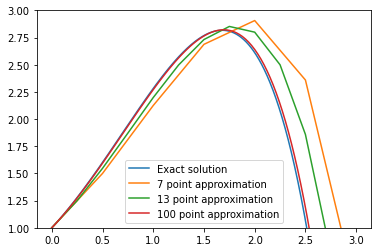

In [19]:
def sol(x) :
    return x**2+2*x+2-np.exp(x)

def f(x,y) :
    return y-x**2

xx = np.linspace(0,3,1000)
s = sol(xx) 

# Lets create three arrays with differently spaced points from 0 to 3.
x1 = np.linspace(0,3,7)      # 7 points (like our practice example)
x2 = np.linspace(0,3,13)    # 13 points
x3 = np.linspace(0,3,100)    # 100 points

# Next, we use the function you created to calculate the corresponding approximate y-values

y1 = euler(f,x1,1)
y2 = euler(f,x2,1)
y3 = euler(f,x3,1)

# And plot everything together with the exact solution that we know.

plt.plot(xx,s,label='Exact solution')
plt.plot(x1,y1,label='7 point approximation')
plt.plot(x2,y2,label='13 point approximation')
plt.plot(x3,y3,label='100 point approximation')

plt.legend()
plt.ylim(1,3)

plt.savefig('eulerplot.png')
plt.show()

## Another d.e.

Now, let's plot some approximate solutions to the d.e.

$$\frac{dy}{dx}=\sin(xy).$$

We *don't know how to solve this exactly*, but but here's the direction field for the d.e. (plotted for $(x,y)\in [0,4]\times [0,4]$):


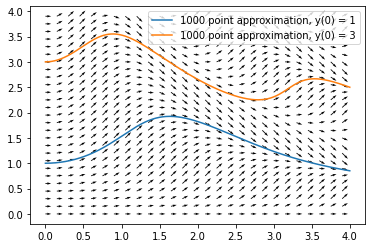

In [32]:
def f(x,y) :
    return np.sin(x*y)

x = np.linspace(0,4,1000)    # 1000 points

y1 = euler(f,x,1)

y2 = euler(f,x,3)

X,Y = np.meshgrid(np.arange(0,4,0.15),np.arange(0,4,0.15))
plt.plot(x,y1,label='1000 point approximation, y(0) = 1')
plt.plot(x,y2,label='1000 point approximation, y(0) = 3')
plt.legend()
U = np.ones(np.shape(X))
V = f(X,Y)
plt.quiver(X,Y,U,V)

plt.savefig('wavylines.png')

plt.show()

# def sol(x) :
#     return x**2+2*x+2-np.exp(x)

# def f(x,y) :
#     return y-x**2

# xx = np.linspace(0,3,1000)
# s = sol(xx) 

# # Lets create three arrays with differently spaced points from 0 to 3.
# x1 = np.linspace(0,3,7)      # 7 points (like our practice example)
# x2 = np.linspace(0,3,13)    # 13 points
# x3 = np.linspace(0,3,100)    # 100 points

# # Next, we use the function you created to calculate the corresponding approximate y-values

# y1 = euler(f,x1,1)
# y2 = euler(f,x2,1)
# y3 = euler(f,x3,1)

# # And plot everything together with the exact solution that we know.

# plt.plot(xx,s,label='Exact solution')
# plt.plot(x1,y1,label='7 point approximation')
# plt.plot(x2,y2,label='13 point approximation')
# plt.plot(x3,y3,label='100 point approximation')

# plt.legend()
# plt.ylim(1,3)

# plt.savefig('eulerplot.png')
# plt.show()

## Exercise

Add some code to the cell above, such that the plot also includes two approximate solutions, both using 1000 equally spaced points from 0 to 4:

- The approximate solution satisfying the initial condition $y(0)=3$.
- The approximate solution satisfying the initial condition $y(0)=1$.

#### Submit the generated plot in LAMS.

In [22]:
x.shape

(1000,)

In [24]:
y1.shape

(100,)